# Carregando dados

News Category Dataset:
https://www.kaggle.com/datasets/rmisra/news-category-dataset

Carregando dataset do Google Drive:
https://drive.google.com/file/d/12ngWcckHQFSLRaQ9qGbteKVKBUS9txR9/view?usp=sharing

In [1]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '12ngWcckHQFSLRaQ9qGbteKVKBUS9txR9' #<-- You add in here the id from you google drive file, you can find it


download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('News_Category_Dataset_v2.json')
data_news  = pd.read_json("News_Category_Dataset_v2.json", lines=True)
data_news.info()
data_news.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


# Visualização dos dados

## Categorias de notícias únicas

In [2]:
# Visualizando categorias únicas
print(data_news.category.unique())

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']


## Distribuição das categorias de notícias

In [3]:
data_news['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

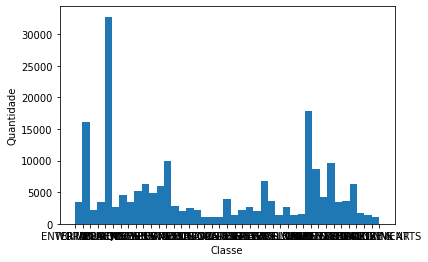

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#np.random.seed(42)
#x = np.random.normal(size=1000)
#plt.axis([500, 1010, 3000, 40000]) 
plt.hist(data_news['category'], density=False, bins=41)  # density=False would make counts
plt.ylabel('Quantidade')
plt.xlabel('Classe');
#plt.figure(figsize=(300,80),facecolor='red',edgecolor='blue')
#plt.axis([50, 110, 30, 6]) 
#plt.show()

# Bag of Words

Etapas de processamento do texto para aplicação do modelo.

referência: https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [5]:
# Util para printar informações

from nltk.tokenize import RegexpTokenizer

#tkn = RegexpTokenizer(r'\w+')
#data_news['tokens'] = data_news['msg_lower'].apply(tkn.tokenize) #aplica o tokenizador da lib nltk.tokenize

#data = data_news['tokens']
def palavras_stats(dados):
  n_token = [word for tokens in dados for word in tokens]
  n_setence = [len(tokens) for tokens in dados]
  vocab = sorted(list(set(n_token)))

  print('Vocabulario (palavras unicas):{0}'.format(len(vocab))) #distinct de palavras (únicas)
  print('Registros (total de noticias):{0}'.format(len(n_setence))) #qtde de sentencas = noticias
  print('Tokens (total de palavras):{0}'.format(len(n_token))) #total de palavras, pontos, etc

  max_sent_length = max([len(doc) for doc in dados])
  print('Maximum Sentence Length: ', max_sent_length)

  max_sent_length = min([len(doc) for doc in dados])
  print('Minimum Sentence Length: ', max_sent_length)

## 1 - Remoção da pontuação

In [6]:
# 1 - Punctuation Removal
#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data_news['clean_msg']= data_news['headline'].apply(lambda x:remove_punctuation(x))
#data_news.head()

## 2 - Conversão de maiúsculas e minúsculas


In [7]:
# 2 - Lowering the text: 
data_news['msg_lower']= data_news['clean_msg'].apply(lambda x: x.lower())
#data.head()

## 3 - Tokenização


In [8]:
# 3 - Tokenization
#defining function for tokenization
# W+ expression (one or more characters which is not an alphanumeric character or an underscore)
import re
def tokenization(text):    
    words = text.split()
    return words
    # tokens = re.split('W+',text)
    # return tokens
#applying function to the column
data_news['msg_tokenied']= data_news['msg_lower'].apply(lambda x: tokenization(x))

### Estatística pós transformação

In [9]:
palavras_stats(data_news['msg_tokenied'])

Vocabulario (palavras unicas):70116
Registros (total de noticias):200853
Tokens (total de palavras):1910360
Maximum Sentence Length:  43
Minimum Sentence Length:  0


## 4 - Remoçao de palavras vazias (stop words)

In [10]:
# 4 - Stop word removal
#importing nlp library
import nltk
nltk.download("stopwords")

stopwords = nltk.corpus.stopwords.words('english')
#Stop words present in the library
stopwords[0:10]

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
data_news['no_stopwords'] = data_news['msg_tokenied'].apply(lambda x:remove_stopwords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Estatística pós transformação


In [11]:
palavras_stats(data_news['no_stopwords'])

Vocabulario (palavras unicas):69979
Registros (total de noticias):200853
Tokens (total de palavras):1350171
Maximum Sentence Length:  36
Minimum Sentence Length:  0


## 5 - Text normalization

### 5.1 - Stemming




In [12]:
# 5 - Stemming
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
data_news['msg_stemmed']=data_news['no_stopwords'].apply(lambda x: stemming(x))

#### Estatística pós transformação

In [13]:
palavras_stats(data_news['msg_stemmed'])

Vocabulario (palavras unicas):50442
Registros (total de noticias):200853
Tokens (total de palavras):1350171
Maximum Sentence Length:  36
Minimum Sentence Length:  0


### 5.2 - Lemmatization

In [14]:
# 6 - Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data_news['msg_lemmatized']=data_news['no_stopwords'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#### Estatística pós transformação

In [15]:
palavras_stats(data_news['msg_lemmatized'])

Vocabulario (palavras unicas):62593
Registros (total de noticias):200853
Tokens (total de palavras):1350171
Maximum Sentence Length:  36
Minimum Sentence Length:  0


# Visualização pós transformação

In [44]:
data_news.head()

,category,headline,authors,link,short_description,date,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized,category_type,msg_stemmed_novo
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,"[there, were, 2, mass, shootings, in, texas, l...","[2, mass, shootings, texas, last, week, 1, tv]","[2, mass, shoot, texa, last, week, 1, tv]","[2, mass, shooting, texas, last, week, 1, tv]",6,2 mass shoot texa last week 1 tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,"[will, smith, joins, diplo, and, nicky, jam, f...","[smith, joins, diplo, nicky, jam, 2018, world,...","[smith, join, diplo, nicki, jam, 2018, world, ...","[smith, join, diplo, nicky, jam, 2018, world, ...",10,smith join diplo nicki jam 2018 world cup offi...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,"[hugh, grant, marries, for, the, first, time, ...","[hugh, grant, marries, first, time, age, 57]","[hugh, grant, marri, first, time, age, 57]","[hugh, grant, marries, first, time, age, 57]",10,hugh grant marri first time age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts Castrato Adam Schiff And Dem...,jim carrey blasts castrato adam schiff and dem...,"[jim, carrey, blasts, castrato, adam, schiff, ...","[jim, carrey, blasts, castrato, adam, schiff, ...","[jim, carrey, blast, castrato, adam, schiff, d...","[jim, carrey, blast, castrato, adam, schiff, d...",10,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,"[julianna, margulies, uses, donald, trump, poo...","[julianna, margulies, uses, donald, trump, poo...","[julianna, marguli, use, donald, trump, poop, ...","[julianna, margulies, us, donald, trump, poop,...",10,julianna marguli use donald trump poop bag pic...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


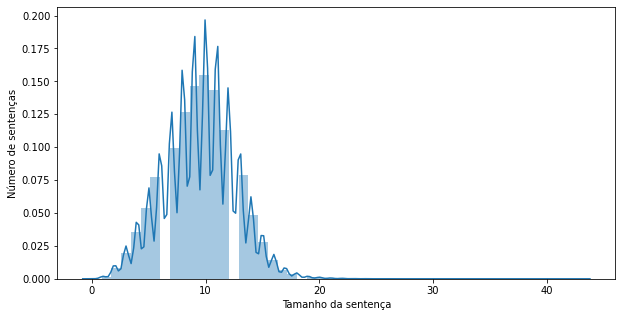

In [45]:

import matplotlib.pyplot as plt
import seaborn as sb

n_token = [word for tokens in data_news["msg_tokenied"] for word in tokens]
n_setence = [len(tokens) for tokens in data_news["msg_tokenied"]]
vocab = sorted(list(set(n_token)))
# print('Vocabulario (palavras unicas):{0}'.format(len(vocab))) #distinct de palavras (únicas)
# print('Registros (total de noticias):{0}'.format(len(n_setence))) #qtde de sentencas = noticias
# print('Tokens (total de palavras):{0}'.format(len(n_token))) #total de palavras, pontos, etc

# tamanho das frases

plt.figure(figsize=(10, 5)) # plt = matplotlib.pyplot
plt.xlabel('Tamanho da sentença')
plt.ylabel('Número de sentenças')
sb.distplot(n_setence) # sb = biblioteca seaborn

# Codificação das categorias "alvo"

In [46]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

data_news['category_type'] = labelencoder.fit_transform(data_news['category'])

print("Categorias únicas: ", list(set(data_news['category_type'])))
print("Labels originais", labelencoder.classes_)



Categorias únicas:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Labels originais ['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'CULTURE & ARTS' 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FIFTY' 'FOOD & DRINK' 'GOOD NEWS' 'GREEN' 'HEALTHY LIVING'
 'HOME & LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'MONEY' 'PARENTING'
 'PARENTS' 'POLITICS' 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE'
 'STYLE & BEAUTY' 'TASTE' 'TECH' 'THE WORLDPOST' 'TRAVEL' 'WEDDINGS'
 'WEIRD NEWS' 'WELLNESS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST']


# Preparação dos dados de entrada

In [47]:
# unificação dos tokens para preparação da entrada
data_news['msg_stemmed_novo']=data_news['msg_stemmed'].apply(lambda x: ' '.join(x))

########################################################
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

data_news_novo = data_news.copy()

data_news_novo["alvo"] = (data_news_novo.category_type).astype(int)
data_news_novo = data_news_novo[["msg_stemmed_novo", "alvo"]]

print("data_news_novo", data_news_novo)

data_news_novo                                          msg_stemmed_novo  alvo
0                        2 mass shoot texa last week 1 tv     6
1       smith join diplo nicki jam 2018 world cup offi...    10
2                      hugh grant marri first time age 57    10
3       jim carrey blast castrato adam schiff democrat...    10
4       julianna marguli use donald trump poop bag pic...    10
...                                                   ...   ...
200848     rim ceo thorsten hein signific plan blackberri    32
200849  maria sharapova stun victoria azarenka austral...    28
200850  giant patriot jet colt among improb super bowl...    28
200851          aldon smith arrest 49er lineback bust dui    28
200852        dwight howard rip teammat magic loss hornet    28

[200853 rows x 2 columns]


## Separação dos dados treino/validação/teste

In [48]:
import numpy as np

train, val, test = np.split(data_news_novo.sample(frac=1, random_state=42), [int(0.8*len(data_news_novo)), int(0.9*len(data_news_novo))])

print("Tamanho treino: ", len(train))
print("Tamanho validação: ", len(val))
print("Tamanho teste: ", len(test))

X_train = train["msg_stemmed_novo"] 
y_train = train["alvo"]

X_val = val["msg_stemmed_novo"] 
y_val = val["alvo"]

X_test = test["msg_stemmed_novo"] 
y_test = test["alvo"]

Tamanho treino:  160682
Tamanho validação:  20085
Tamanho teste:  20086


## Criação do dicionário de dados

In [49]:
# formatando a entrada
X_train_text = []
for X in X_train:
  X_train_text.append(X)

X_test_text = []
for X in X_test:
  X_test_text.append(X)

X_val_text = []
for X in X_val:
  X_val_text.append(X)

# categorias únicas dos dados de treino
unique_classes = list(set(y_train))
print("Unique classes: ", unique_classes)
target_classes = unique_classes

# len(X_train_text)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text)

print("Vocabulary Size : {}".format(len(tokenizer.index_word)))

max_tokens = 26
## Vectorizing data to keep max_tokens words per sample.
X_train_vect = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_tokens, padding="post", truncating="post", value=0)
X_val_vect  = pad_sequences(tokenizer.texts_to_sequences(X_val_text), maxlen=max_tokens, padding="post", truncating="post", value=0)
X_test_vect  = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=max_tokens, padding="post", truncating="post", value=0)

#X_train_vect.shape

Unique classes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Vocabulary Size : 45271


### Visualizando frases convertidas pelo dicionário de palavras

In [50]:
print(X_train_vect[:2])

[[ 125 6130 1124 1025 5435 1301   75 3936    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   9    2 4061 1174 2915   60 3210    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]


# Modelo da Rede Neural

## Instanciando o modelo

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import gc

embed_len = 25

model = Sequential([
                    layers.Embedding(len(tokenizer.index_word)+1, embed_len, input_length=max_tokens),
                    layers.Flatten(),
                    layers.Dense(128, activation="relu"),
                    # layers.Dense(64, activation="relu"),
                    # layers.Dense(32, activation="relu"),
                    layers.Dense(len(target_classes), activation="softmax")
                    ]
                )

model.summary()
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 26, 25)            1131800   
                                                                 
 flatten_3 (Flatten)         (None, 650)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               83328     
                                                                 
 dense_7 (Dense)             (None, 41)                5289      
                                                                 
Total params: 1,220,417
Trainable params: 1,220,417
Non-trainable params: 0
_________________________________________________________________


## Treinando com os dados de treino



Epoch 1/20
628/628 [==============================] - 14s 21ms/step - loss: 2.4696 - accuracy: 0.3710 - val_loss: 1.9347 - val_accuracy: 0.4940
Epoch 2/20
628/628 [==============================] - 13s 21ms/step - loss: 1.6260 - accuracy: 0.5631 - val_loss: 1.6569 - val_accuracy: 0.5504
Epoch 3/20
628/628 [==============================] - 15s 23ms/step - loss: 1.2838 - accuracy: 0.6423 - val_loss: 1.6052 - val_accuracy: 0.5613
Epoch 4/20
628/628 [==============================] - 13s 21ms/step - loss: 1.0723 - accuracy: 0.6989 - val_loss: 1.6364 - val_accuracy: 0.5606
Epoch 5/20
628/628 [==============================] - 14s 22ms/step - loss: 0.9168 - accuracy: 0.7418 - val_loss: 1.7142 - val_accuracy: 0.5529
Epoch 6/20
628/628 [==============================] - 14s 22ms/step - loss: 0.7985 - accuracy: 0.7762 - val_loss: 1.8101 - val_accuracy: 0.5447
Epoch 7/20
628/628 [==============================] - 13s 20ms/step - loss: 0.7063 - accuracy: 0.8017 - val_loss: 1.9144 - val_accuracy:

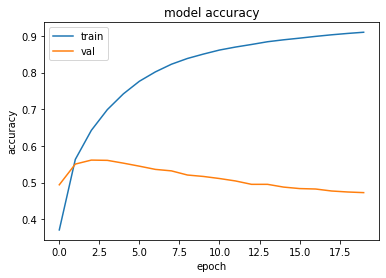

In [52]:
history = model.fit(X_train_vect, y_train, batch_size=256, epochs=20, validation_data=(X_val_vect, y_val))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Avaliando com dados de teste

In [53]:
model.evaluate(X_test_vect, y_test)

628/628 [==============================] - 1s 2ms/step - loss: 3.5746 - accuracy: 0.4777


[3.574612855911255, 0.4777456820011139]

## Matriz de confusão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


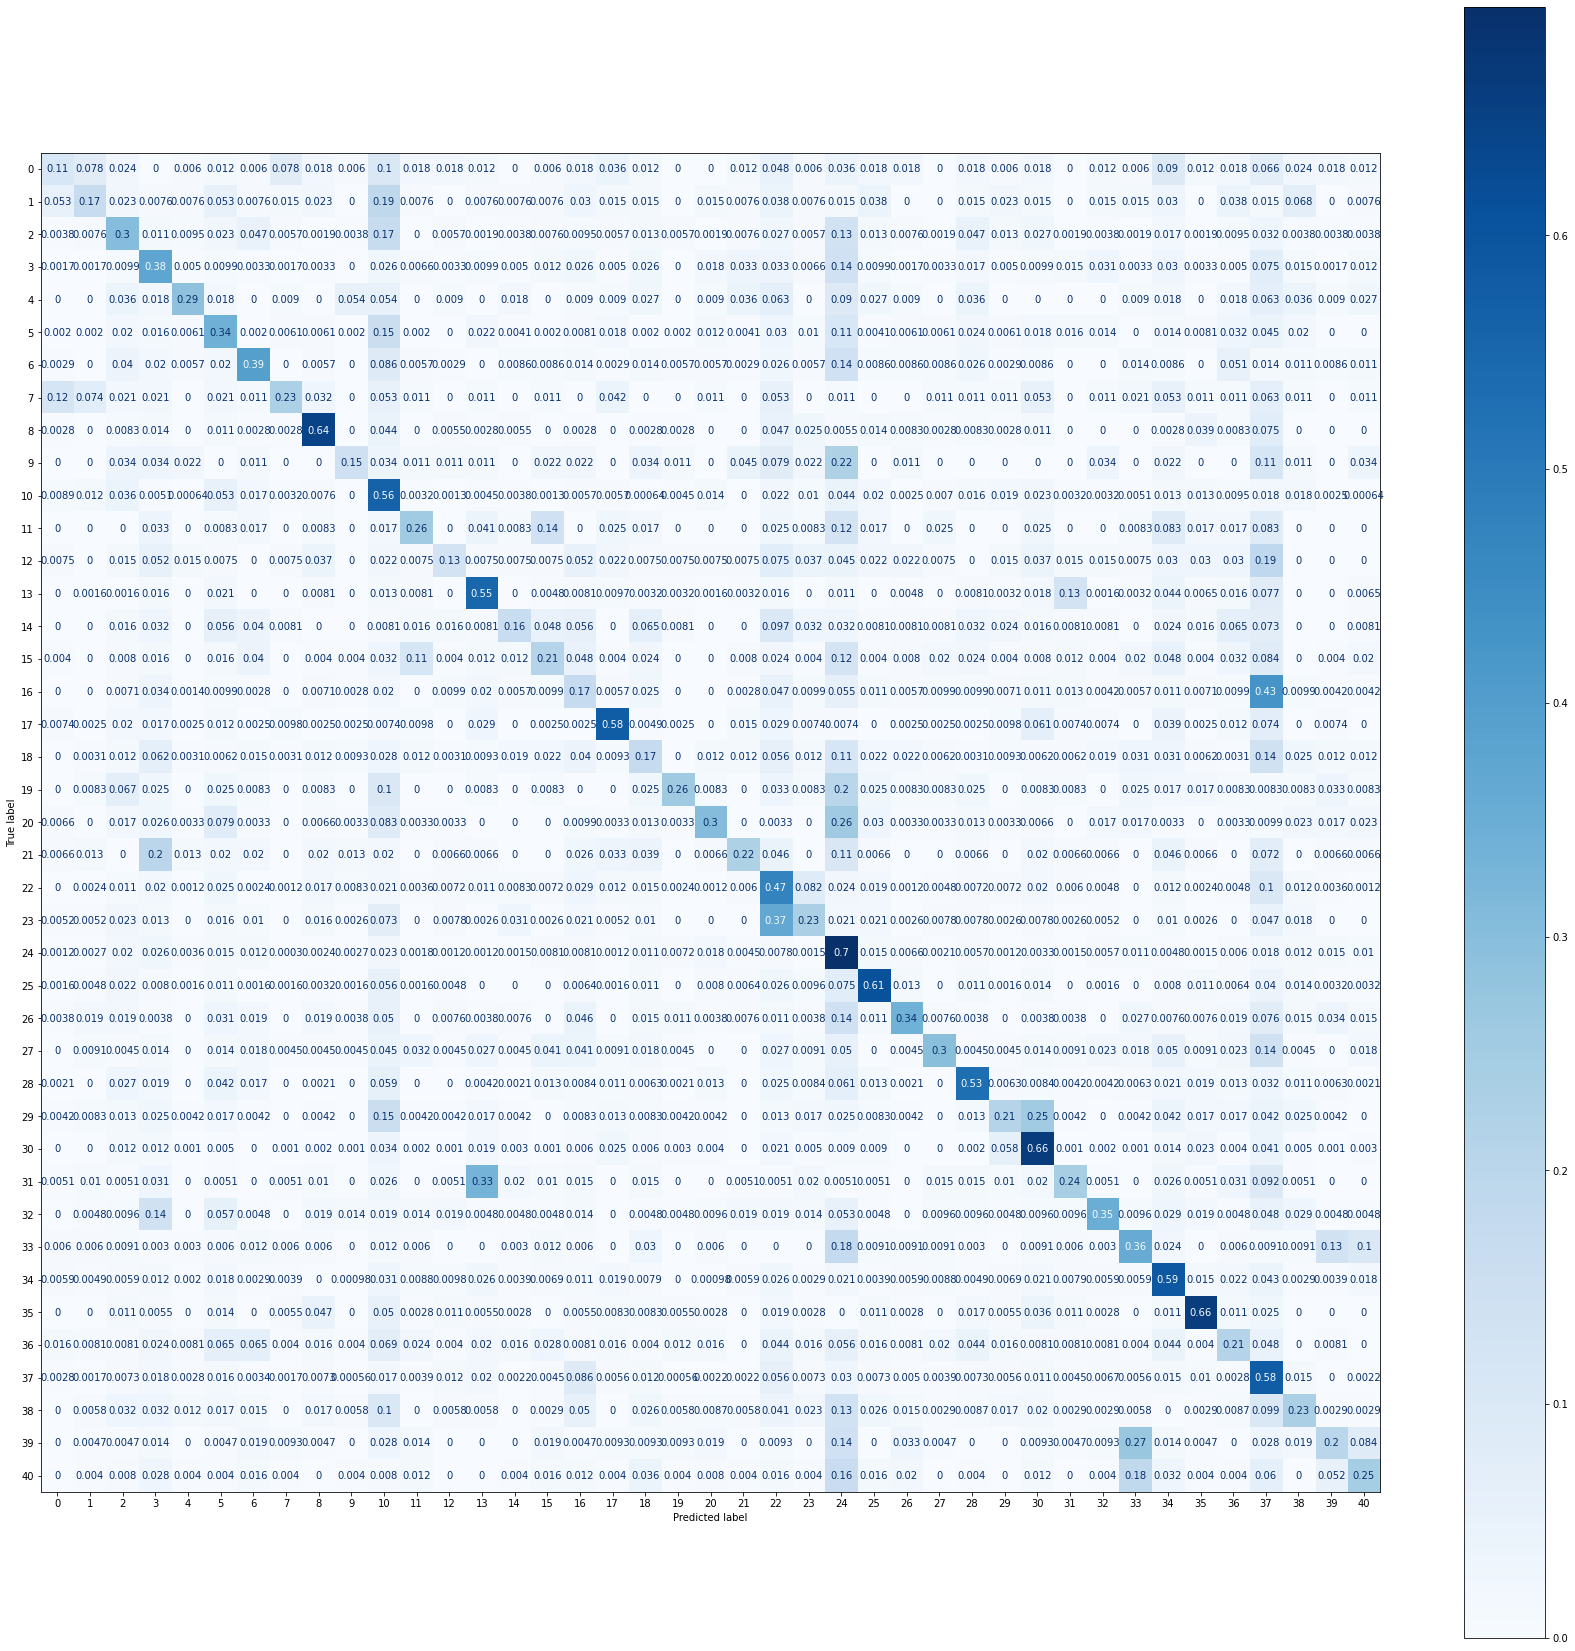

In [54]:
from sklearn.metrics import plot_confusion_matrix

class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, target_classes)

figsize = (30,30)
plot_confusion_matrix(estimator=classifier, X=X_test_vect, y_true=y_test, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])

In [55]:
print("Labels originais", labelencoder.classes_[8])
print("Labels originais", labelencoder.classes_[10])
print("Labels originais", labelencoder.classes_[13])
print("Labels originais", labelencoder.classes_[17])
print("Labels originais", labelencoder.classes_[24])
print("Labels originais", labelencoder.classes_[28])
print("Labels originais", labelencoder.classes_[30])
print("Labels originais", labelencoder.classes_[34])
print("Labels originais", labelencoder.classes_[35])
print("Labels originais", labelencoder.classes_[37])


Labels originais DIVORCE
Labels originais ENTERTAINMENT
Labels originais FOOD & DRINK
Labels originais HOME & LIVING
Labels originais POLITICS
Labels originais SPORTS
Labels originais STYLE & BEAUTY
Labels originais TRAVEL
Labels originais WEDDINGS
Labels originais WELLNESS


# Balanceando os dados de entrada

In [56]:
data_news_balanceado = data_news.groupby('category_type')
data_news_balanceado = data_news_balanceado.apply(lambda x: x.sample(1000).reset_index(drop=True))
data_news_balanceado['category_type'].value_counts()

0     1000
21    1000
23    1000
24    1000
25    1000
26    1000
27    1000
28    1000
29    1000
30    1000
31    1000
32    1000
33    1000
34    1000
35    1000
36    1000
37    1000
38    1000
39    1000
22    1000
20    1000
1     1000
19    1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
13    1000
14    1000
15    1000
16    1000
17    1000
18    1000
40    1000
Name: category_type, dtype: int64

In [57]:
data_news_balanceado["alvo"] = (data_news_balanceado.category_type).astype(int)
data_news_balanceado = data_news_balanceado[["msg_stemmed_novo", "alvo"]]

print("data_news_balanceado", data_news_balanceado)

data_news_balanceado                                                     msg_stemmed_novo  alvo
category_type                                                             
0             0    cant believ red rock canyon tree exist planet ...     0
              1                 debunk myth kara walker sugar sphinx     0
              2                           yiddishwongish fun theater     0
              3    ted gioia bar talk musicologist make club owne...     0
              4                                 jean ritchi cool day     0
...                                                              ...   ...
40            995                  week world war june 27juli 3 1915    40
              996          isi use wheat suppli tighten control iraq    40
              997  singapor found prime minist die report prime m...    40
              998           south africa africa largest economi mean    40
              999                     expert take isi gain mean iraq    40

[41

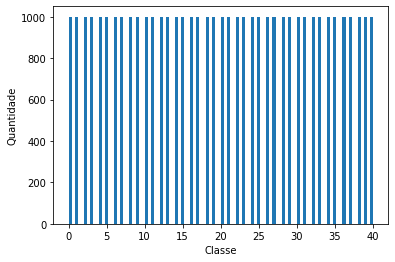

In [58]:
plt.hist(data_news_balanceado['alvo'], density=False, bins=100)  # density=False would make counts
plt.ylabel('Quantidade')
plt.xlabel('Classe');

## Separação dos dados treino/validação/teste

In [59]:
import numpy as np

train, val, test = np.split(data_news_balanceado.sample(frac=1, random_state=42), [int(0.8*len(data_news_balanceado)), int(0.9*len(data_news_balanceado))])

print("Tamanho treino: ", len(train))
print("Tamanho validação: ", len(val))
print("Tamanho teste: ", len(test))

X_train = train["msg_stemmed_novo"] 
y_train = train["alvo"]

X_val = val["msg_stemmed_novo"] 
y_val = val["alvo"]

X_test = test["msg_stemmed_novo"] 
y_test = test["alvo"]

Tamanho treino:  32800
Tamanho validação:  4100
Tamanho teste:  4100


In [60]:
# formatando a entrada
X_train_text = []
for X in X_train:
  X_train_text.append(X)

X_test_text = []
for X in X_test:
  X_test_text.append(X)

X_val_text = []
for X in X_val:
  X_val_text.append(X)

# categorias únicas dos dados de treino
unique_classes = list(set(y_train))
print("Unique classes: ", unique_classes)
target_classes = unique_classes

# len(X_train_text)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text)

print("Vocabulary Size : {}".format(len(tokenizer.index_word)))

max_tokens = 26
## Vectorizing data to keep max_tokens words per sample.
X_train_vect = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_tokens, padding="post", truncating="post", value=0)
X_val_vect  = pad_sequences(tokenizer.texts_to_sequences(X_val_text), maxlen=max_tokens, padding="post", truncating="post", value=0)
X_test_vect  = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=max_tokens, padding="post", truncating="post", value=0)

#X_train_vect.shape

Unique classes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Vocabulary Size : 21722


## Instanciando o modelo

In [61]:
model = Sequential([
                    layers.Embedding(len(tokenizer.index_word)+1, embed_len, input_length=max_tokens),
                    layers.Flatten(),
                    layers.Dense(128, activation="relu"),
                    # layers.Dense(64, activation="relu"),
                    # layers.Dense(32, activation="relu"),
                    layers.Dense(len(target_classes), activation="softmax")
                    ]
                )

model.summary()
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 26, 25)            543075    
                                                                 
 flatten_4 (Flatten)         (None, 650)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               83328     
                                                                 
 dense_9 (Dense)             (None, 41)                5289      
                                                                 
Total params: 631,692
Trainable params: 631,692
Non-trainable params: 0
_________________________________________________________________


## Treinando com os dados de treino

Epoch 1/20
129/129 [==============================] - 2s 15ms/step - loss: 3.6702 - accuracy: 0.0413 - val_loss: 3.5869 - val_accuracy: 0.0568
Epoch 2/20
129/129 [==============================] - 2s 14ms/step - loss: 3.2990 - accuracy: 0.1549 - val_loss: 3.0667 - val_accuracy: 0.2041
Epoch 3/20
129/129 [==============================] - 2s 14ms/step - loss: 2.5699 - accuracy: 0.3361 - val_loss: 2.5878 - val_accuracy: 0.3171
Epoch 4/20
129/129 [==============================] - 2s 14ms/step - loss: 1.9543 - accuracy: 0.4957 - val_loss: 2.3789 - val_accuracy: 0.3717
Epoch 5/20
129/129 [==============================] - 2s 14ms/step - loss: 1.5289 - accuracy: 0.6030 - val_loss: 2.3226 - val_accuracy: 0.3866
Epoch 6/20
129/129 [==============================] - 2s 15ms/step - loss: 1.2240 - accuracy: 0.6855 - val_loss: 2.3629 - val_accuracy: 0.3871
Epoch 7/20
129/129 [==============================] - 2s 15ms/step - loss: 0.9855 - accuracy: 0.7516 - val_loss: 2.4369 - val_accuracy: 0.3844

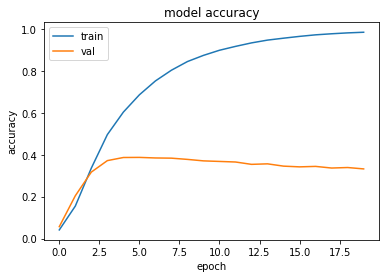

In [62]:
history  = model.fit(X_train_vect, y_train, batch_size=256, epochs=20, validation_data=(X_val_vect, y_val))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Avaliando com dados de teste

In [63]:
model.evaluate(X_test_vect, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 4.2880 - accuracy: 0.3429


[4.287974834442139, 0.34292683005332947]

## Matriz de confusão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


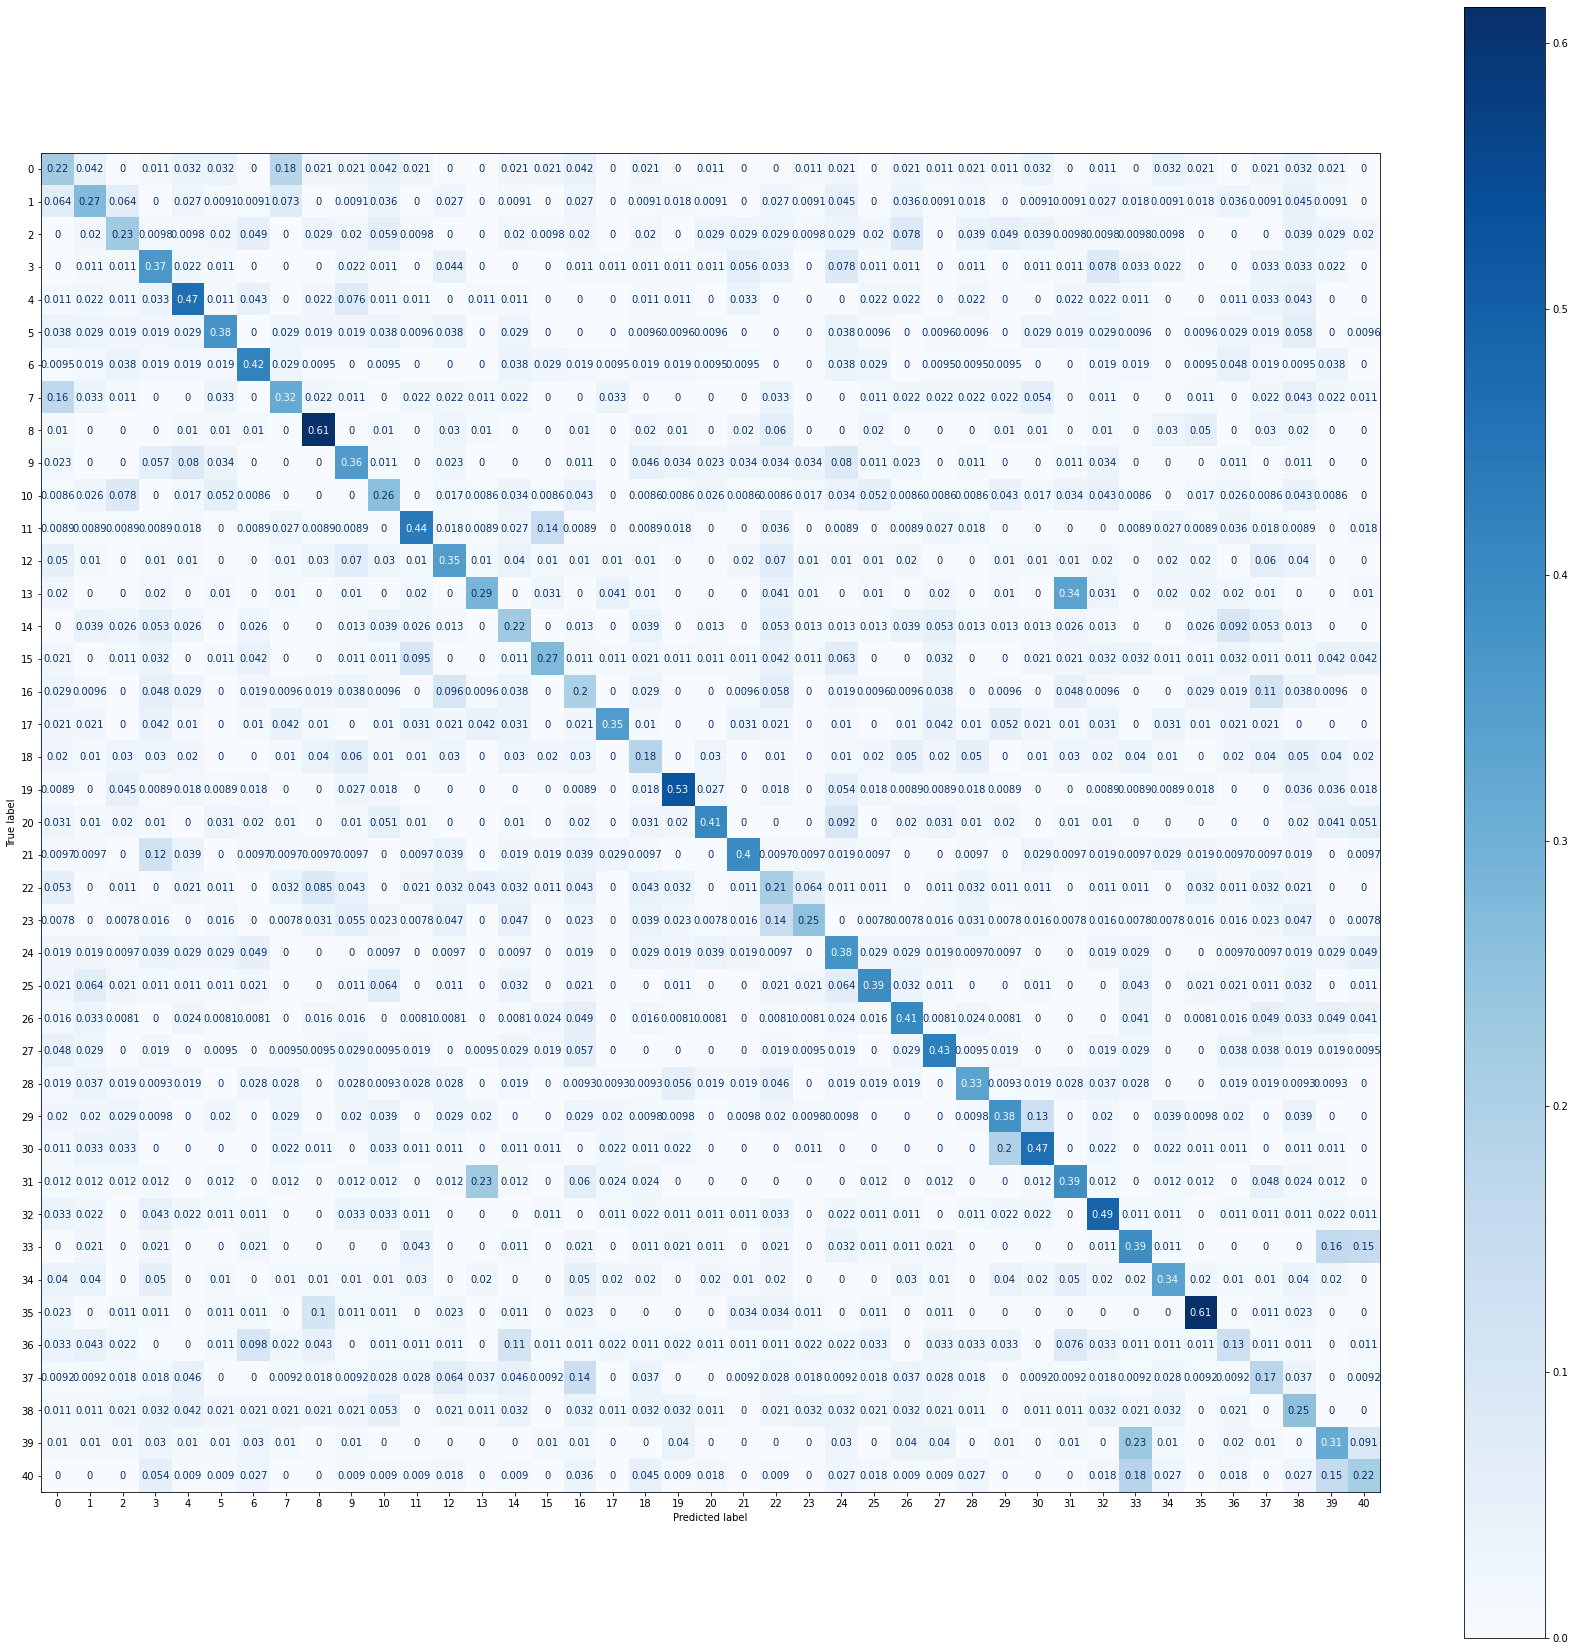

In [64]:
classifier = estimator(model, target_classes)

figsize = (30,30)
plot_confusion_matrix(estimator=classifier, X=X_test_vect, y_true=y_test, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])

In [65]:
print("Labels originais", labelencoder.classes_[8])
print("Labels originais", labelencoder.classes_[17])
print("Labels originais", labelencoder.classes_[19])
print("Labels originais", labelencoder.classes_[30])
print("Labels originais", labelencoder.classes_[32])
print("Labels originais", labelencoder.classes_[35])

Labels originais DIVORCE
Labels originais HOME & LIVING
Labels originais LATINO VOICES
Labels originais STYLE & BEAUTY
Labels originais TECH
Labels originais WEDDINGS
